In [1]:
%run ../template.ipynb

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
exp_id = "050318-corr"
series_names = ["mainstream", "maxsharing", "nosharing"]
num_apps_range = range(3, 30+1)
# num_apps_range = range(3, 5+1)
corr_types = ["ind", "emp", "dep"]


In [4]:
setups = dataloaders.load_setups(exp_id,
                                 setup_file_str="/setups.*{version}.pickle")


Loading setups...

/Users/daniel/Dropbox/CMU/Projects/mainstream/mainstream-analysis/src/dataloaders/SetupLoader.py:84: UserWarning: Duplicate setup c67fea64.v1
  warnings.warn("Duplicate setup " + setup.uuid)
/Users/daniel/Dropbox/CMU/Projects/mainstream/mainstream-analysis/src/dataloaders/SetupLoader.py:84: UserWarning: Duplicate setup 58931970.v1
  warnings.warn("Duplicate setup " + setup.uuid)
/Users/daniel/Dropbox/CMU/Projects/mainstream/mainstream-analysis/src/dataloaders/SetupLoader.py:84: UserWarning: Duplicate setup e8b277c6.v1
  warnings.warn("Duplicate setup " + setup.uuid)


 Done (2697 loaded)


In [5]:
rows = []
for series_name in series_names:
    for corr in corr_types:
        schedules = dataloaders.load_schedules(exp_id,
                                               "greedy." + series_name + ".sim.*-" + corr + ".v1",
                                               setups=setups)
        rows += ex(schedules,
                   each=lambda s: s.to_map({'correlation': mean([app['correlation_coefficient'] for app in s._apps])}),
                   constant={'scheduler': 'greedy', 'sharing': series_name, 'corr_type': corr})
df = comb(rows)

In [6]:
rows = []
all_schedules = []
for series_name in series_names:
    for corr in corr_types:
        schedules = dataloaders.load_schedules(exp_id,
                                               "greedy." + series_name + ".sim.*-" + corr + ".v1",
                                               setups=setups)
        all_schedules += schedules
        rows += ex(schedules,
                   each=lambda s: s.to_map({'correlation': mean([app['correlation_coefficient'] for app in s._apps])}),
                   constant={'scheduler': 'greedy', 'sharing': series_name, 'corr_type': corr})
df = comb(rows)

In [7]:
schedules_ = dataloaders.load_schedules(exp_id, "greedy.mainstream.sim.*-dep.v1", setups=setups)

In [8]:
schedules_ind = dataloaders.load_schedules(exp_id, "greedy.mainstream.sim.*-ind.v1", setups=setups)

In [9]:
schedules_emp = dataloaders.load_schedules(exp_id, "greedy.mainstream.sim.*-emp.v1", setups=setups)

In [10]:
from pprint import pprint
rows_ = []
for corr_type, schedules in zip(corr_types, [schedules_ind, schedules_emp, schedules_]):
    for s in schedules:
        for app, f1, recall, precision, fps, frozen in zip(s._apps, s.f1s, s.recalls, s.precisions, s.fpses, s.frozens):
            rows_.append({'num_apps': s.num_apps, 'budget':s.budget, 'f1': f1, 'event_length_ms': app['event_length_ms'], 'event_frequency': app['event_frequency'], 'fps': fps, 'frozen': frozen, 'recall': recall, 'precision': precision, 'app_name': app['app_id'].split(":")[0], 'corr_type':corr_type, 'correlation': app['correlation_coefficient'], 'setup_id': s._setup.uuid})
    #     print([app['correlation_coefficient'] for app in schedule._apps])
df_ = pd.DataFrame(rows_)

In [11]:
pd.options.display.max_rows = 200
pd.options.display.max_columns = 40

In [13]:
df_view = df_[df_['num_apps'] == 2]
df_view.groupby(['app_name', 'budget'])['f1'].agg(['mean', 'max'])

mean       max
app_name                budget                    
bus-mobilenet244        100.0   0.696627  0.797663
                        150.0   0.823998  0.896166
                        200.0   0.832631  0.900573
                        250.0   0.835079  0.904224
                        300.0   0.835747  0.905686
                        350.0   0.835888  0.906762
cars-mobilenet244       100.0   0.793064  0.855268
                        150.0   0.946378  0.973329
                        200.0   0.951463  0.975230
                        250.0   0.951674  0.975230
                        300.0   0.951825  0.975230
                        350.0   0.951840  0.975230
cats-mobilenet244       100.0   0.625880  0.711018
                        150.0   0.742271  0.819412
                        200.0   0.745285  0.822676
                        250.0   0.745521  0.822676
                        300.0   0.745521  0.822676
                        350.0   0.745521  0.822676
flowers-mobilenet244    100.0   0.653610  0.756144
                        150.0   0.787474  0.878754
                        200.0   0.791586  0.891723
                        250.0   0.792353  0.891723
                        300.0   0.792411  0.891723
                        350.0   0.792411  0.891723
pedestrian-mobilenet244 100.0   0.600870  0.699359
                        150.0   0.683963  0.783868
                        200.0   0.686630  0.788263
                        250.0   0.688096  0.790304
                        300.0   0.688096  0.790304
                        350.0   0.688096  0.790304
redcar-mobilenet244     100.0   0.396286  0.496812
                        150.0   0.457590  0.557855
                        200.0   0.464515  0.567201
                        250.0   0.466309  0.567840
                        300.0   0.467263  0.567840
                        350.0   0.467428  0.567840
schoolbus-mobilenet244  100.0   0.519430  0.674118
                        150.0   0.602252  0.751343
                        200.0   0.607098  0.754724
                        250.0   0.610166  0.758420
                        300.0   0.610166  0.758420
                        350.0   0.610166  0.758420
scramble-mobilenet244   100.0   0.356275  0.498141
                        150.0   0.396973  0.559071
                        200.0   0.399543  0.560604
                        250.0   0.400031  0.560604
                        300.0   0.400031  0.560604
                        350.0   0.400031  0.560604
train-mobilenet244      100.0   0.665019  0.762919
                        150.0   0.747430  0.852446
                        200.0   0.757572  0.873677
                        250.0   0.760728  0.890330
                        300.0   0.760728  0.890330
                        350.0   0.760728  0.890330

In [14]:
df_view = df_[df_['num_apps'] == 2]

# df_view = df_[df_['budget'] == 200]
# df_groupby(['app_name', 'num_apps'])['f1'].mean()
pd.pivot_table(df_, index=['num_apps'], columns=['app_name'], values='f1', aggfunc='mean')
# std deviation for real datasets is 10x synthetic ones
normed_f1 = df_view.groupby('app_name')['f1'].mean()
print normed_f1

app_name
bus-mobilenet244           0.809995
cars-mobilenet244          0.924374
cats-mobilenet244          0.725000
flowers-mobilenet244       0.768307
pedestrian-mobilenet244    0.672625
redcar-mobilenet244        0.453232
schoolbus-mobilenet244     0.593213
scramble-mobilenet244      0.392147
train-mobilenet244         0.742035
Name: f1, dtype: float64


In [15]:
def normz(f1_, app_):
    return f1_ / normed_f1[app_['app_id'].split(":")[0]]

In [16]:
rows = []
for series_name in series_names:
    for corr in corr_types:
        schedules = dataloaders.load_schedules(exp_id,
                                               "greedy." + series_name + ".sim.*-" + corr + ".v1",
                                               setups=setups)
        rows += ex(schedules,
                   each=lambda s: s.to_map({'normed_f1': mean([normz(f1, app) for f1, app in zip(s.f1s, s._apps)]),
                                            'correlation': mean([app['correlation_coefficient'] for app in s._apps])}),
                   constant={'scheduler': 'greedy', 'sharing': series_name, 'corr_type': corr})
df_normed = comb(rows)

In [17]:
metrics = ['normed_f1']
for corr in corr_types:
    for budget in set(df_normed['budget'].values):
        df_view = df_normed[(df_normed['budget'] == budget) & (df_normed['corr_type'] == corr)]

        grouped = df_view.groupby(['sharing', 'num_apps'])

        series2 = agg2series(grouped['fps'].mean(),
                             names=series_names,
                             plotstyles=styles.SERIES_ALT,
                             plotparams='bg')

        for metric in metrics:
            series = agg2series(grouped[metric].mean(),
                                names=series_names,
                                plotparams='fg')

            ax = plot.variants(series,
                               xgrid=grids.x.num_apps,
                               ygrid=grids.y.get('f1'))

            save('scheduler', exp_id, '{}-7hybrid-corr_{}-b{:g}'.format(metric, corr, budget))
            plt.close()
# 
            ax1, ax2 = plot.variants_dual(series, series2,
                                          xgrid=grids.x.num_apps,
                                          ygrid=grids.y.get('f1'),
                                          ygrid2=grids.y.fps)
            # legends.dual_fps(ax1, ax2, left=metric.capitalize())
            legends.hide(ax1, ax2)

            save('scheduler', exp_id, '{}-7hybrid-corr_{}-dual-b{:g}'.format(metric, corr, budget))
            plt.close()

/Users/daniel/Dropbox/CMU/Projects/mainstream/mainstream-analysis/2018-Spring/plots/scheduler/050318-corr/normed_f1-7hybrid-corr_ind-b100.pdf saved
/Users/daniel/Dropbox/CMU/Projects/mainstream/mainstream-analysis/2018-Spring/plots/scheduler/050318-corr/normed_f1-7hybrid-corr_ind-dual-b100.pdf saved
/Users/daniel/Dropbox/CMU/Projects/mainstream/mainstream-analysis/2018-Spring/plots/scheduler/050318-corr/normed_f1-7hybrid-corr_ind-b200.pdf saved
/Users/daniel/Dropbox/CMU/Projects/mainstream/mainstream-analysis/2018-Spring/plots/scheduler/050318-corr/normed_f1-7hybrid-corr_ind-dual-b200.pdf saved
/Users/daniel/Dropbox/CMU/Projects/mainstream/mainstream-analysis/2018-Spring/plots/scheduler/050318-corr/normed_f1-7hybrid-corr_ind-b300.pdf saved
/Users/daniel/Dropbox/CMU/Projects/mainstream/mainstream-analysis/2018-Spring/plots/scheduler/050318-corr/normed_f1-7hybrid-corr_ind-dual-b300.pdf saved
/Users/daniel/Dropbox/CMU/Projects/mainstream/mainstream-analysis/2018-Spring/plots/scheduler/050

In [29]:
df_view = df_[df_['budget'] == 200]
# df_groupby(['app_name', 'num_apps'])['f1'].mean()
pd.pivot_table(df_view, index=['num_apps'], columns=['app_name', 'corr_type'], values='f1', aggfunc='mean')
# std deviation for real datasets is 10x synthetic ones

app_name  bus-mobilenet244                     cars-mobilenet244            \
corr_type              dep       emp       ind               dep       emp   
num_apps                                                                     
2                 0.838685  0.830375  0.828835          0.949632  0.952015   
4                 0.813060  0.832647  0.830889          0.934003  0.949773   
6                 0.771698  0.821794  0.820689          0.913084  0.943445   
8                 0.752481  0.810032  0.806884          0.898514  0.923146   
10                0.738954  0.792512  0.791159          0.894972  0.909337   
15                0.718859  0.754492  0.753874          0.894388  0.902117   
20                0.716839  0.731936  0.731569          0.894846  0.901752   
25                0.718168  0.719884  0.718989          0.895391  0.902363   
30                0.718967  0.716846  0.717155          0.894888  0.901787   

app_name            cats-mobilenet244                      \
corr_type       ind               dep       emp       ind   
num_apps                                                    
2          0.952743          0.741042  0.746594  0.748220   
4          0.950216          0.719826  0.727253  0.728236   
6          0.944797          0.713644  0.723317  0.724406   
8          0.923248          0.708811  0.723065  0.724545   
10         0.914181          0.705507  0.719034  0.720283   
15         0.904286          0.702042  0.712307  0.714347   
20         0.903848          0.701680  0.708939  0.710933   
25         0.904454          0.703843  0.710168  0.712091   
30         0.903831          0.702610  0.708236  0.710214   

app_name  flowers-mobilenet244                     pedestrian-mobilenet244  \
corr_type                  dep       emp       ind                     dep   
num_apps                                                                     
2                     0.787924  0.792573  0.794262                0.702259   
4                     0.781418  0.791204  0.792718                0.698502   
6                     0.768431  0.797987  0.800429                0.682619   
8                     0.741272  0.796107  0.798233                0.681748   
10                    0.718563  0.791002  0.792894                0.673182   
15                    0.694081  0.775759  0.776710                0.664181   
20                    0.687226  0.744917  0.746674                0.658836   
25                    0.689444  0.729006  0.734258                0.659734   
30                    0.690760  0.720167  0.726352                0.662817   

app_name                      redcar-mobilenet244                      \
corr_type       emp       ind                 dep       emp       ind   
num_apps                                                                
2          0.680274  0.677356            0.462977  0.465141  0.465428   
4          0.681237  0.678759            0.440005  0.446676  0.446968   
6          0.674314  0.672006            0.419612  0.438533  0.438425   
8          0.677167  0.674876            0.419050  0.439427  0.439603   
10         0.675493  0.673175            0.403724  0.432756  0.432686   
15         0.672093  0.669811            0.387045  0.415483  0.416747   
20         0.663837  0.662600            0.377242  0.404830  0.406737   
25         0.658478  0.657109            0.370148  0.398890  0.400503   
30         0.656373  0.656417            0.368834  0.396260  0.398651   

app_name  schoolbus-mobilenet244                     scramble-mobilenet244  \
corr_type                    dep       emp       ind                   dep   
num_apps                                                                     
2                       0.619337  0.601915  0.600041              0.403874   
4                       0.615671  0.608854  0.606818              0.397643   
6                       0.606995  0.619653  0.617855              0.408538   
8                       0.592336  0.615232  0.61

In [20]:
df_view = df_[df_['budget'] == 150]
# df_groupby(['app_name', 'num_apps'])['f1'].mean()
pd.pivot_table(df_view, index=['num_apps'], columns=['app_name', 'corr_type'], values='f1', aggfunc='mean')
# std deviation for real datasets is 10x synthetic ones

app_name  bus-mobilenet244                     cars-mobilenet244            \
corr_type              dep       emp       ind               dep       emp   
num_apps                                                                     
2                 0.819373  0.827057  0.825565          0.938419  0.949543   
4                 0.745281  0.808804  0.802221          0.917369  0.932755   
6                 0.730885  0.769278  0.771061          0.900475  0.911502   
8                 0.723323  0.740078  0.738673          0.892984  0.899621   
10                0.722085  0.724720  0.723141          0.892448  0.898964   
15                0.711076  0.702275  0.701100          0.893893  0.900623   
20                0.670118  0.686370  0.685102          0.733196  0.779198   
25                0.663263  0.556871  0.557197          0.784028  0.590284   
30                0.709568  0.473562  0.477404          0.889972  0.540239   

app_name            cats-mobilenet244                      \
corr_type       ind               dep       emp       ind   
num_apps                                                    
2          0.951172          0.736594  0.743951  0.746269   
4          0.933750          0.710199  0.721305  0.722587   
6          0.912996          0.706340  0.713041  0.714459   
8          0.901046          0.703082  0.711343  0.713410   
10         0.900729          0.700984  0.708938  0.711179   
15         0.902235          0.700034  0.707424  0.709415   
20         0.782157          0.665635  0.687660  0.692177   
25         0.618513          0.647654  0.566023  0.577387   
30         0.548871          0.697307  0.448102  0.447670   

app_name  flowers-mobilenet244                     pedestrian-mobilenet244  \
corr_type                  dep       emp       ind                     dep   
num_apps                                                                     
2                     0.785273  0.787944  0.789205                0.694259   
4                     0.721399  0.762989  0.765391                0.674241   
6                     0.711206  0.744728  0.753388                0.665968   
8                     0.689665  0.731873  0.734733                0.663433   
10                    0.687002  0.716401  0.722644                0.660188   
15                    0.689820  0.713518  0.717815                0.656192   
20                    0.666111  0.694162  0.696497                0.633790   
25                    0.634759  0.563851  0.572563                0.616316   
30                    0.688449  0.439026  0.442019                0.655001   

app_name                      redcar-mobilenet244                      \
corr_type       emp       ind                 dep       emp       ind   
num_apps                                                                
2          0.680274  0.677356            0.457882  0.457363  0.457524   
4          0.680651  0.676867            0.419694  0.427017  0.429733   
6          0.669600  0.667590            0.398282  0.410809  0.413430   
8          0.664205  0.661384            0.390217  0.401740  0.403851   
10         0.654799  0.655181            0.376400  0.384780  0.389059   
15         0.645336  0.643799            0.370629  0.380205  0.382547   
20         0.634238  0.632050            0.368495  0.378929  0.380720   
25         0.533856  0.538412            0.378851  0.368593  0.370588   
30         0.464681  0.466899            0.382965  0.356380  0.359181   

app_name  schoolbus-mobilenet244                     scramble-mobilenet244  \
corr_type                    dep       emp       ind                   dep   
num_apps                                                                     
2                       0.604801  0.601915  0.600041              0.397972   
4                       0.585603  0.599054  0.598040              0.370012   
6                       0.582776  0.596603  0.595588              0.374674   
8                       0.566169  0.573110  0.57

In [21]:
df_view = df_[df_['budget'] == 150]
# df_groupby(['app_name', 'num_apps'])['f1'].mean()
pd.pivot_table(df_view, index=['num_apps'], columns=['app_name', 'corr_type'], values='fps', aggfunc='mean')
# std deviation for real datasets is 10x synthetic ones

app_name  bus-mobilenet244                     cars-mobilenet244            \
corr_type              dep       emp       ind               dep       emp   
num_apps                                                                     
2                 5.480000  5.000000  5.000000          5.304348  5.521739   
4                 6.269231  5.000000  5.000000          5.341463  5.585366   
6                 6.206349  5.000000  5.000000          5.253968  5.746032   
8                 6.244444  5.000000  5.000000          5.278481  5.962025   
10                6.181818  4.983471  4.983471          5.307692  6.019231   
15                6.215470  5.000000  4.994475          5.273292  6.118012   
20                5.008696  4.878261  4.878261          3.985981  4.355140   
25                4.916084  4.283217  4.468531          4.581132  5.045283   
30                5.408955  3.880597  4.056716          5.103550  4.775148   

app_name            cats-mobilenet244                      \
corr_type       ind               dep       emp       ind   
num_apps                                                    
2          5.565217          5.176471  5.647059  5.764706   
4          5.463415          5.277778  5.611111  5.750000   
6          5.587302          5.350877  5.684211  5.771930   
8          5.848101          5.317073  5.841463  5.853659   
10         5.855769          5.326923  5.942308  5.894231   
15         5.925466          5.348387  5.980645  5.935484   
20         4.378505          5.043478  5.367150  5.415459   
25         5.101887          4.737643  4.140684  4.216730   
30         4.763314          5.170213  3.218845  3.215805   

app_name  flowers-mobilenet244                     pedestrian-mobilenet244  \
corr_type                  dep       emp       ind                     dep   
num_apps                                                                     
2                     5.304348  5.565217  5.521739                6.047619   
4                     5.500000  5.500000  5.500000                6.243902   
6                     5.605263  5.763158  5.710526                6.140625   
8                     5.757895  5.821053  5.789474                6.223529   
10                    5.647059  5.957983  5.890756                6.250000   
15                    5.658683  6.161677  6.131737                6.302632   
20                    5.233480  5.572687  5.563877                5.471963   
25                    4.721831  4.140845  4.200704                5.125448   
30                    5.142857  3.258929  3.276786                5.498489   

app_name                      redcar-mobilenet244                      \
corr_type       emp       ind                 dep       emp       ind   
num_apps                                                                
2          5.000000  5.000000            5.045455  5.227273  5.500000   
4          5.000000  5.000000            5.421053  5.368421  5.315789   
6          5.000000  5.000000            5.322581  5.532258  5.483871   
8          5.000000  5.000000            5.188235  5.729412  5.658824   
10         4.980769  4.980769            5.178218  6.009901  5.821782   
15         5.000000  5.000000            5.365854  6.195122  6.109756   
20         4.985981  4.985981            5.361233  6.114537  6.035242   
25         4.960573  4.985663            5.365942  5.478261  5.489130   
30         4.870091  4.879154            5.260736  5.736196  5.723926   

app_name  schoolbus-mobilenet244                     scramble-mobilenet244  \
corr_type                    dep       emp       ind                   dep   
num_apps                                                                     
2                       5.708333  5.000000  5.000000              5.590909   
4                       5.653061  4.959184  4.979592              5.558140   
6                       5.702381  5.000000  5.000000              5.514706   
8                       5.825243  4.990291  4.97

In [22]:
df_view = df_[df_['budget'] == 150]
# df_groupby(['app_name', 'num_apps'])['f1'].mean()
pd.pivot_table(df_view, index=['num_apps'], columns=['app_name', 'corr_type'], values='frozen', aggfunc='mean')
# std deviation for real datasets is 10x synthetic ones

app_name  bus-mobilenet244                       cars-mobilenet244             \
corr_type              dep        emp        ind               dep        emp   
num_apps                                                                        
2                34.200000  22.440000  22.200000         35.347826  29.086957   
4                70.846154  41.076923  41.884615         61.243902  52.170732   
6                77.571429  61.666667  60.238095         75.190476  73.000000   
8                79.466667  74.133333  73.933333         79.860759  78.873418   
10               80.504132  78.371901  78.322314         80.826923  80.250000   
15               81.000000  80.701657  80.602210         81.000000  80.925466   
20               81.000000  80.921739  80.895652         81.000000  81.042056   
25               80.664336  81.167832  81.335664         81.113208  82.267925   
30               80.838806  81.492537  81.608955         81.000000  82.331361   

app_name             cats-mobilenet244                        \
corr_type        ind               dep        emp        ind   
num_apps                                                       
2          27.000000         40.411765  37.941176  42.529412   
4          51.146341         63.166667  47.666667  55.666667   
6          72.238095         67.631579  64.052632  69.842105   
8          79.101266         77.487805  72.804878  75.439024   
10         80.019231         79.903846  78.000000  78.634615   
15         80.888199         80.961290  80.612903  80.535484   
20         81.042056         81.000000  80.913043  80.884058   
25         82.188679         80.931559  80.977186  80.977186   
30         82.322485         81.000000  81.000000  81.000000   

app_name  flowers-mobilenet244                       pedestrian-mobilenet244  \
corr_type                  dep        emp        ind                     dep   
num_apps                                                                       
2                    25.173913  28.565217  28.565217               75.000000   
4                    57.346154  48.807692  49.038462               79.243902   
6                    73.105263  68.684211  67.894737               79.218750   
8                    79.421053  75.947368  76.010526               80.364706   
10                   80.294118  78.882353  78.630252               80.711538   
15                   81.000000  80.784431  80.640719               80.921053   
20                   81.000000  80.894273  80.841410               81.000000   
25                   80.894366  80.957746  80.830986               80.913978   
30                   80.982143  81.000000  81.000000               80.981873   

app_name                        redcar-mobilenet244                        \
corr_type        emp        ind                 dep        emp        ind   
num_apps                                                                    
2          75.000000  75.000000           22.090909  22.909091  24.545455   
4          75.146341  75.439024           50.052632  42.315789  39.947368   
6          76.031250  75.937500           61.935484  54.290323  52.838710   
8          77.752941  77.894118           72.035294  67.658824  66.882353   
10         79.269231  78.750000           76.306931  76.009901  74.049505   
15         80.684211  80.565789           80.707317  80.378049  80.085366   
20         81.000000  81.000000           81.000000  80.471366  80.444934   
25         81.483871  81.376344           77.673913  80.597826  80.456522   
30         82.141994  82.141994           76.757669  82.122699  82.104294   

app_name  schoolbus-mobilenet244                       scramble-mobilenet244  \
corr_type                    dep        emp        ind                   dep   
num_apps                                                                       
2                      33.000000  27.000000  27.000000             64.090909   
4                      54.551020  36.551020  35.9387

In [23]:
df_view = df_[df_['budget'] == 150]
# df_groupby(['app_name', 'num_apps'])['f1'].mean()
pd.pivot_table(df_view, index=['num_apps'], columns=['app_name', 'corr_type'], values='event_length_ms', aggfunc='mean')
# std deviation for real datasets is 10x synthetic ones

app_name  bus-mobilenet244                         cars-mobilenet244  \
corr_type              dep         emp         ind               dep   
num_apps                                                               
2               440.000000  440.000000  440.000000        450.000000   
4               448.076923  448.076923  448.076923        453.658537   
6               449.206349  449.206349  449.206349        451.587302   
8               449.444444  449.444444  449.444444        448.101266   
10              451.239669  451.239669  451.239669        448.557692   
15              451.104972  451.104972  451.104972        450.931677   
20              452.173913  452.173913  452.173913        450.467290   
25              452.622378  452.622378  452.622378        450.566038   
30              451.641791  451.641791  451.641791        450.887574   

app_name                          cats-mobilenet244                          \
corr_type         emp         ind               dep         emp         ind   
num_apps                                                                      
2          450.000000  450.000000        450.000000  450.000000  450.000000   
4          453.658537  453.658537        452.777778  452.777778  452.777778   
6          451.587302  451.587302        461.403509  461.403509  461.403509   
8          448.101266  448.101266        456.707317  456.707317  456.707317   
10         448.557692  448.557692        451.923077  451.923077  451.923077   
15         450.931677  450.931677        452.580645  452.580645  452.580645   
20         450.467290  450.467290        450.241546  450.241546  450.241546   
25         450.566038  450.566038        451.901141  451.901141  451.901141   
30         450.887574  450.887574        452.735562  452.735562  452.735562   

app_name  flowers-mobilenet244                          \
corr_type                  dep         emp         ind   
num_apps                                                 
2                   441.304348  441.304348  441.304348   
4                   448.076923  448.076923  448.076923   
6                   446.710526  446.710526  446.710526   
8                   446.315789  446.315789  446.315789   
10                  446.218487  446.218487  446.218487   
15                  448.502994  448.502994  448.502994   
20                  448.237885  448.237885  448.237885   
25                  447.359155  447.359155  447.359155   
30                  448.065476  448.065476  448.065476   

app_name  pedestrian-mobilenet244                         redcar-mobilenet244  \
corr_type                     dep         emp         ind                 dep   
num_apps                                                                        
2                      464.285714  464.285714  464.285714          447.727273   
4                      457.317073  457.317073  457.317073          443.421053   
6                      453.906250  453.906250  453.906250          445.161290   
8                      456.470588  456.470588  456.470588          450.588235   
10                     456.730769  456.730769  456.730769          451.980198   
15                     454.276316  454.276316  454.276316          453.353659   
20                     453.037383  453.037383  453.037383          452.202643   
25                     451.971326  451.971326  451.971326          451.630435   
30                     451.963746  451.963746  451.963746          451.073620   

app_name                          schoolbus-mobilenet244              \
corr_type         emp         ind                    dep         emp   
num_apps                                                               
2          447.727273  447.727273             433.333333  433.333333   
4          443.421053  443.421053             442.857143  442.857143   
6          445.161290  445.161290             442.857143  442.857143   
8          450.588235  450.588235             445.631068  445.631068   
10         4

In [24]:
df_view = df_[df_['budget'] == 150]
# df_groupby(['app_name', 'num_apps'])['f1'].mean()
pd.pivot_table(df_view, index=['num_apps'], columns=['app_name', 'corr_type'], values='event_frequency', aggfunc='mean')
# std deviation for real datasets is 10x synthetic ones

app_name  bus-mobilenet244                     cars-mobilenet244            \
corr_type              dep       emp       ind               dep       emp   
num_apps                                                                     
2                 0.200000  0.200000  0.200000          0.195652  0.195652   
4                 0.207692  0.207692  0.207692          0.190244  0.190244   
6                 0.204762  0.204762  0.204762          0.195238  0.195238   
8                 0.203333  0.203333  0.203333          0.193671  0.193671   
10                0.205785  0.205785  0.205785          0.195192  0.195192   
15                0.200552  0.200552  0.200552          0.198758  0.198758   
20                0.200435  0.200435  0.200435          0.200935  0.200935   
25                0.200699  0.200699  0.200699          0.202642  0.202642   
30                0.202090  0.202090  0.202090          0.202071  0.202071   

app_name            cats-mobilenet244                      \
corr_type       ind               dep       emp       ind   
num_apps                                                    
2          0.195652          0.223529  0.223529  0.223529   
4          0.190244          0.205556  0.205556  0.205556   
6          0.195238          0.201754  0.201754  0.201754   
8          0.193671          0.202439  0.202439  0.202439   
10         0.195192          0.200962  0.200962  0.200962   
15         0.198758          0.199355  0.199355  0.199355   
20         0.200935          0.198551  0.198551  0.198551   
25         0.202642          0.200000  0.200000  0.200000   
30         0.202071          0.198176  0.198176  0.198176   

app_name  flowers-mobilenet244                     pedestrian-mobilenet244  \
corr_type                  dep       emp       ind                     dep   
num_apps                                                                     
2                     0.165217  0.165217  0.165217                0.214286   
4                     0.167308  0.167308  0.167308                0.214634   
6                     0.180263  0.180263  0.180263                0.209375   
8                     0.184211  0.184211  0.184211                0.211765   
10                    0.184874  0.184874  0.184874                0.208654   
15                    0.199401  0.199401  0.199401                0.206579   
20                    0.194714  0.194714  0.194714                0.204206   
25                    0.198239  0.198239  0.198239                0.204301   
30                    0.199405  0.199405  0.199405                0.207251   

app_name                      redcar-mobilenet244                      \
corr_type       emp       ind                 dep       emp       ind   
num_apps                                                                
2          0.214286  0.214286            0.222727  0.222727  0.222727   
4          0.214634  0.214634            0.210526  0.210526  0.210526   
6          0.209375  0.209375            0.206452  0.206452  0.206452   
8          0.211765  0.211765            0.209412  0.209412  0.209412   
10         0.208654  0.208654            0.205941  0.205941  0.205941   
15         0.206579  0.206579            0.206707  0.206707  0.206707   
20         0.204206  0.204206            0.205727  0.205727  0.205727   
25         0.204301  0.204301            0.203623  0.203623  0.203623   
30         0.207251  0.207251            0.203988  0.203988  0.203988   

app_name  schoolbus-mobilenet244                     scramble-mobilenet244  \
corr_type                    dep       emp       ind                   dep   
num_apps                                                                     
2                       0.170833  0.170833  0.170833              0.172727   
4                       0.183673  0.183673  0.183673              0.172093   
6                       0.189286  0.189286  0.189286              0.183824   
8                       0.189320  0.189320  0.18

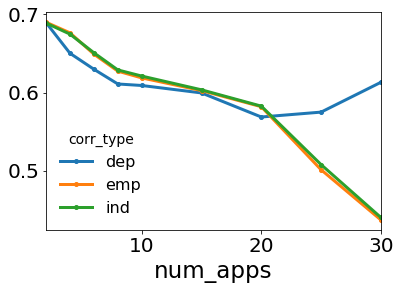

In [27]:
df_view = df_[df_['budget'] == 150]
# df_groupby(['app_name', 'num_apps'])['f1'].mean()
pd.pivot_table(df_view, index=['num_apps'], columns=['corr_type'], values='f1').plot(marker='.')